In [1]:
#NOTE: THIS SECTION OF CODE IS FOR FORWARD-FEEDING MODEL PREDICTIONS.

In [1]:
# randomly set the inital parameters
import random
import math
import time
import pandas as pd
import numpy as np
#import pyarrow as pa
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

In [2]:
#pip install pyarrow

In [3]:
pd.set_option("display.max_columns", None)

In [4]:
pd.set_option("display.max_rows", None)

In [5]:
#Note: The code from here below is for pushing the prediction forward into later-stage models.

In [6]:
#Read file statement.  
#df_read = pd.read_csv('C:/Users/JHeminger/Desktop/DAEN 690/testingfile.csv')

In [7]:
#Read file statement.  
#df_read2 = pd.read_csv('C:/Users/JHeminger/Desktop/DAEN 690/testingfile.csv')

In [8]:
#Read parquet file for training.  Set this to be the tenk_train_data
df_read = pq.read_table('C:/Users/JHeminger/Desktop/DAEN 690/tenk_train_data.pq').to_pandas()

In [9]:
#Read pqrquet file for testing.  Set this to be the tenk_test_data
df_read2 = pq.read_table('C:/Users/JHeminger/Desktop/DAEN 690/tenk_train_data.pq').to_pandas()

In [10]:
#Create a "stall_1" to "stall_4" variable where all other scenarios are 0.
df_read['stall_1'] = df_read['stall'].replace({2: 0, 3: 0, 4: 0})

In [11]:
df_read['stall_2'] = df_read['stall'].replace({1: 0, 2: 1, 3: 0, 4: 0})

In [12]:
df_read['stall_3'] = df_read['stall'].replace({1: 0, 2: 0, 3: 1, 4: 0})

In [13]:
#set window for rolling stats
window = 10;

In [15]:
#rolling averages
df_read['roll_avg_pitch'] = df_read.groupby('name')['pitch'].transform(lambda x: x.rolling(window, 2).mean())
df_read['roll_avg_flight_path_angle'] = df_read.groupby('name')['flight_path_angle'].transform(lambda x: x.rolling(window, 2).mean())
df_read['roll_avg_airspeed'] = df_read.groupby('name')['airspeed'].transform(lambda x: x.rolling(window, 2).mean())
df_read['roll_avg_AOA'] = df_read.groupby('name')['AOA'].transform(lambda x: x.rolling(window, 2).mean())
df_read['roll_avg_roll'] = df_read.groupby('name')['roll'].transform(lambda x: x.rolling(window, 2).mean())
df_read['roll_avg_vertical_speed'] = df_read.groupby('name')['vertical_speed'].transform(lambda x: x.rolling(window, 2).mean())
df_read['roll_avg_altitude'] = df_read.groupby('name')['altitude'].transform(lambda x: x.rolling(window, 2).mean())

In [16]:
#rolling variance
df_read['roll_var_pitch'] = df_read.groupby('name')['pitch'].transform(lambda x: x.rolling(window, 2).var())
df_read['roll_var_flight_path_angle'] = df_read.groupby('name')['flight_path_angle'].transform(lambda x: x.rolling(window, 2).var())
df_read['roll_var_airspeed'] = df_read.groupby('name')['airspeed'].transform(lambda x: x.rolling(window, 2).var())
df_read['roll_var_AOA'] = df_read.groupby('name')['AOA'].transform(lambda x: x.rolling(window, 2).var())
df_read['roll_var_roll'] = df_read.groupby('name')['roll'].transform(lambda x: x.rolling(window, 2).var())
df_read['roll_var_vertical_speed'] = df_read.groupby('name')['vertical_speed'].transform(lambda x: x.rolling(window, 2).var())
df_read['roll_var_altitude'] = df_read.groupby('name')['altitude'].transform(lambda x: x.rolling(window, 2).var())

In [17]:
#Replaces all rolling statistic values equal to NaN, and sets them to 0.
df_read = df_read.fillna(0)

In [18]:
#Create a "stall_1" to "stall_4" variable where all other scenarios are 0.
df_read2['stall_1'] = df_read2['stall'].replace({2: 0, 3: 0, 4: 0})

In [19]:
df_read2['stall_2'] = df_read2['stall'].replace({1: 0, 2: 1, 3: 0, 4: 0})

In [20]:
df_read2['stall_3'] = df_read2['stall'].replace({1: 0, 2: 0, 3: 1, 4: 0})

In [21]:
#set window for rolling stats
window = 10;

In [22]:
#rolling averages
df_read2['roll_avg_pitch'] = df_read2.groupby('name')['pitch'].transform(lambda x: x.rolling(window, 2).mean())
df_read2['roll_avg_flight_path_angle'] = df_read2.groupby('name')['flight_path_angle'].transform(lambda x: x.rolling(window, 2).mean())
df_read2['roll_avg_airspeed'] = df_read2.groupby('name')['airspeed'].transform(lambda x: x.rolling(window, 2).mean())
df_read2['roll_avg_AOA'] = df_read2.groupby('name')['AOA'].transform(lambda x: x.rolling(window, 2).mean())
df_read2['roll_avg_roll'] = df_read2.groupby('name')['roll'].transform(lambda x: x.rolling(window, 2).mean())
df_read2['roll_avg_vertical_speed'] = df_read2.groupby('name')['vertical_speed'].transform(lambda x: x.rolling(window, 2).mean())
df_read2['roll_avg_altitude'] = df_read2.groupby('name')['altitude'].transform(lambda x: x.rolling(window, 2).mean())

In [23]:
#rolling variance
df_read2['roll_var_pitch'] = df_read2.groupby('name')['pitch'].transform(lambda x: x.rolling(window, 2).var())
df_read2['roll_var_flight_path_angle'] = df_read2.groupby('name')['flight_path_angle'].transform(lambda x: x.rolling(window, 2).var())
df_read2['roll_var_airspeed'] = df_read2.groupby('name')['airspeed'].transform(lambda x: x.rolling(window, 2).var())
df_read2['roll_var_AOA'] = df_read2.groupby('name')['AOA'].transform(lambda x: x.rolling(window, 2).var())
df_read2['roll_var_roll'] = df_read2.groupby('name')['roll'].transform(lambda x: x.rolling(window, 2).var())
df_read2['roll_var_vertical_speed'] = df_read2.groupby('name')['vertical_speed'].transform(lambda x: x.rolling(window, 2).var())
df_read2['roll_var_altitude'] = df_read2.groupby('name')['altitude'].transform(lambda x: x.rolling(window, 2).var())

In [24]:
#Replaces all rolling statistic values equal to NaN, and sets them to 0.
df_read2 = df_read2.fillna(0)

In [25]:
#Rolling window and raw input variables combined.
feature_cols = [
    'altitude',
    'vertical_speed',
    'roll',
    'AOA',
    'airspeed',
    'flight_path_angle',
    'pitch',
    'roll_avg_pitch',
    'roll_avg_flight_path_angle',
    'roll_avg_airspeed',
    'roll_avg_AOA',
    'roll_avg_roll',
    'roll_avg_vertical_speed',
    'roll_avg_altitude',
    'roll_var_pitch',
    'roll_var_flight_path_angle',
    'roll_var_airspeed',
    'roll_var_AOA',
    'roll_var_roll',
    'roll_var_vertical_speed',
    'roll_var_altitude'
]

In [26]:
#Training data set.
#Tweak stall_1 to be stall_2-3 for other scenario models.
X_train = df_read[feature_cols]
y_train = df_read.stall_1

In [27]:
#Testing data set.
X_test = df_read2[feature_cols]
y_test = df_read2.stall_1

In [28]:
logreg = LogisticRegression(max_iter=300)

In [29]:
logreg.fit(X_train, y_train)

C:\Users\JHeminger\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=300)

In [30]:
y_pred = logreg.predict(X_test)

In [31]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[2809630,   29191],
       [ 153396,  225125]], dtype=int64)

<AxesSubplot:>

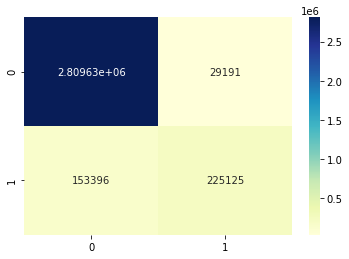

In [32]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='d')


In [33]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9432491168175469
Precision: 0.885217603296686
Recall: 0.5947490363810727


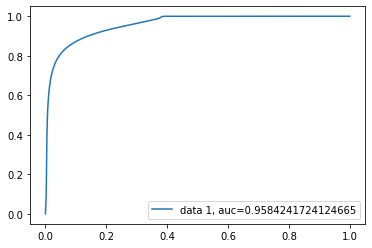

In [34]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label = "data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [31]:
prediction_onsetstall = logreg.predict(X_train)
prediction_onsetstall2 = logreg.predict(X_test)

In [32]:
df_read['prediction_stall1'] = prediction_onsetstall
df_read2['prediction_stall1'] = prediction_onsetstall2

In [33]:
df_read['prediction_inputvariable_stall1'] = df_read.groupby('name')['prediction_stall1'].transform(lambda x: x.rolling(3, 1).mean())
df_read2['prediction_inputvariable_stall1'] = df_read2.groupby('name')['prediction_stall1'].transform(lambda x: x.rolling(3, 1).mean())

In [34]:
df_read = df_read.fillna(0)
df_read2 = df_read.fillna(0)

In [35]:
#Rolling window and raw input variables combined.
feature_cols = [
    'altitude',
    'vertical_speed',
    'roll',
    'AOA',
    'airspeed',
    'flight_path_angle',
    'pitch',
    'roll_avg_pitch',
    'roll_avg_flight_path_angle',
    'roll_avg_airspeed',
    'roll_avg_AOA',
    'roll_avg_roll',
    'roll_avg_vertical_speed',
    'roll_avg_altitude',
    'roll_var_pitch',
    'roll_var_flight_path_angle',
    'roll_var_airspeed',
    'roll_var_AOA',
    'roll_var_roll',
    'roll_var_vertical_speed',
    'roll_var_altitude',
    'prediction_inputvariable_stall1'
]

In [36]:
#Training data set.
#Tweak stall_1 to be stall_2-3 for other scenario models.
X_train = df_read[feature_cols]
y_train = df_read.stall_2

In [37]:
#Testing data set.
X_test = df_read2[feature_cols]
y_test = df_read2.stall_2

In [38]:
logreg = LogisticRegression(max_iter=300)

In [39]:
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=300)

In [40]:
prediction_onsetstall = logreg.predict(X_train)
prediction_onsetstall2 = logreg.predict(X_test)

In [41]:
df_read['prediction_stall2'] = prediction_onsetstall
df_read2['prediction_stall2'] = prediction_onsetstall2

In [42]:
df_read['prediction_inputvariable_stall2'] = df_read.groupby('name')['prediction_stall2'].transform(lambda x: x.rolling(3, 1).mean())
df_read2['prediction_inputvariable_stall2'] = df_read2.groupby('name')['prediction_stall2'].transform(lambda x: x.rolling(3, 1).mean())

In [43]:
df_read = df_read.fillna(0)
df_read2 = df_read.fillna(0)

In [44]:
#Rolling window and raw input variables combined.
feature_cols = [
    'altitude',
    'vertical_speed',
    'roll',
    'AOA',
    'airspeed',
    'flight_path_angle',
    'pitch',
    'roll_avg_pitch',
    'roll_avg_flight_path_angle',
    'roll_avg_airspeed',
    'roll_avg_AOA',
    'roll_avg_roll',
    'roll_avg_vertical_speed',
    'roll_avg_altitude',
    'roll_var_pitch',
    'roll_var_flight_path_angle',
    'roll_var_airspeed',
    'roll_var_AOA',
    'roll_var_roll',
    'roll_var_vertical_speed',
    'roll_var_altitude',
    'prediction_inputvariable_stall1',
    'prediction_inputvariable_stall2'
]

In [45]:
#Training data set.
#Tweak stall_1 to be stall_2-3 for other scenario models.
X_train = df_read[feature_cols]
y_train = df_read.stall_3

#Testing data set.
X_test = df_read2[feature_cols]
y_test = df_read2.stall_3

In [46]:
logreg = LogisticRegression(max_iter=300)

In [47]:
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=300)

In [48]:
y_pred = logreg.predict(X_test)

In [49]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[10894,    15],
       [  113,     1]], dtype=int64)

<AxesSubplot:>

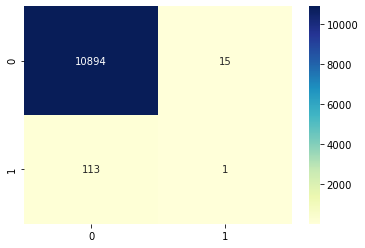

In [50]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt = 'g')

In [51]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9883879161752699
Precision: 0.0625
Recall: 0.008771929824561403


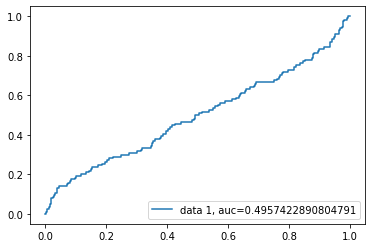

In [52]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label = "data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [13]:
#NOTE: THIS SECTION OF CODE IS FOR REGULAR PREDICTION OF BINARY OUTCOME VARIABLES, WITH NO FORWARD-FEEDING PREDICTIONS.

In [14]:
# randomly set the inital parameters
import random
import math
import time
import pandas as pd
import numpy as np
#import pyarrow as pa
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

In [15]:
#Read file statement.  
#df_read = pd.read_csv('C:/Users/JHeminger/Desktop/DAEN 690/testingfile.csv')

In [16]:
#Read file statement.  
#df_read2 = pd.read_csv('C:/Users/JHeminger/Desktop/DAEN 690/testingfile.csv')

In [3]:
#Read parquet file for training.  Set this to be the tenk_train_data
df_read = pq.read_table('C:/Users/JHeminger/Desktop/DAEN 690/tenk_train_data.pq').to_pandas()

In [4]:
#Read pqrquet file for testing.  Set this to be the tenk_test_data
df_read2 = pq.read_table('C:/Users/JHeminger/Desktop/DAEN 690/tenk_train_data.pq').to_pandas()

In [5]:
#Create a "stall_1" to "stall_4" variable where all other scenarios are 0.
df_read['stall_1'] = df_read['stall'].replace({2: 0, 3: 0, 4: 0})

In [6]:
df_read['stall_2'] = df_read['stall'].replace({1: 0, 2: 1, 3: 0, 4: 0})

In [7]:
df_read['stall_3'] = df_read['stall'].replace({1: 0, 2: 0, 3: 1, 4: 0})

In [8]:
#set window for rolling stats
window = 10;

In [9]:
#rolling averages
df_read['roll_avg_pitch'] = df_read.groupby('name')['pitch'].transform(lambda x: x.rolling(window, 2).mean())
df_read['roll_avg_flight_path_angle'] = df_read.groupby('name')['flight_path_angle'].transform(lambda x: x.rolling(window, 2).mean())
df_read['roll_avg_airspeed'] = df_read.groupby('name')['airspeed'].transform(lambda x: x.rolling(window, 2).mean())
df_read['roll_avg_AOA'] = df_read.groupby('name')['AOA'].transform(lambda x: x.rolling(window, 2).mean())
df_read['roll_avg_roll'] = df_read.groupby('name')['roll'].transform(lambda x: x.rolling(window, 2).mean())
df_read['roll_avg_vertical_speed'] = df_read.groupby('name')['vertical_speed'].transform(lambda x: x.rolling(window, 2).mean())
df_read['roll_avg_altitude'] = df_read.groupby('name')['altitude'].transform(lambda x: x.rolling(window, 2).mean())

In [10]:
#rolling variance
df_read['roll_var_pitch'] = df_read.groupby('name')['pitch'].transform(lambda x: x.rolling(window, 2).var())
df_read['roll_var_flight_path_angle'] = df_read.groupby('name')['flight_path_angle'].transform(lambda x: x.rolling(window, 2).var())
df_read['roll_var_airspeed'] = df_read.groupby('name')['airspeed'].transform(lambda x: x.rolling(window, 2).var())
df_read['roll_var_AOA'] = df_read.groupby('name')['AOA'].transform(lambda x: x.rolling(window, 2).var())
df_read['roll_var_roll'] = df_read.groupby('name')['roll'].transform(lambda x: x.rolling(window, 2).var())
df_read['roll_var_vertical_speed'] = df_read.groupby('name')['vertical_speed'].transform(lambda x: x.rolling(window, 2).var())
df_read['roll_var_altitude'] = df_read.groupby('name')['altitude'].transform(lambda x: x.rolling(window, 2).var())

In [11]:
#Replaces all rolling statistic values equal to NaN, and sets them to 0.
df_read = df_read.fillna(0)

In [12]:
#Create a "stall_1" to "stall_4" variable where all other scenarios are 0.
df_read2['stall_1'] = df_read2['stall'].replace({2: 0, 3: 0, 4: 0})

In [13]:
df_read2['stall_2'] = df_read2['stall'].replace({1: 0, 2: 1, 3: 0, 4: 0})

In [14]:
df_read2['stall_3'] = df_read2['stall'].replace({1: 0, 2: 0, 3: 1, 4: 0})

In [15]:
#set window for rolling stats
window = 10;

In [16]:
#rolling averages
df_read2['roll_avg_pitch'] = df_read2.groupby('name')['pitch'].transform(lambda x: x.rolling(window, 2).mean())
df_read2['roll_avg_flight_path_angle'] = df_read2.groupby('name')['flight_path_angle'].transform(lambda x: x.rolling(window, 2).mean())
df_read2['roll_avg_airspeed'] = df_read2.groupby('name')['airspeed'].transform(lambda x: x.rolling(window, 2).mean())
df_read2['roll_avg_AOA'] = df_read2.groupby('name')['AOA'].transform(lambda x: x.rolling(window, 2).mean())
df_read2['roll_avg_roll'] = df_read2.groupby('name')['roll'].transform(lambda x: x.rolling(window, 2).mean())
df_read2['roll_avg_vertical_speed'] = df_read2.groupby('name')['vertical_speed'].transform(lambda x: x.rolling(window, 2).mean())
df_read2['roll_avg_altitude'] = df_read2.groupby('name')['altitude'].transform(lambda x: x.rolling(window, 2).mean())

In [17]:
#rolling variance
df_read2['roll_var_pitch'] = df_read2.groupby('name')['pitch'].transform(lambda x: x.rolling(window, 2).var())
df_read2['roll_var_flight_path_angle'] = df_read2.groupby('name')['flight_path_angle'].transform(lambda x: x.rolling(window, 2).var())
df_read2['roll_var_airspeed'] = df_read2.groupby('name')['airspeed'].transform(lambda x: x.rolling(window, 2).var())
df_read2['roll_var_AOA'] = df_read2.groupby('name')['AOA'].transform(lambda x: x.rolling(window, 2).var())
df_read2['roll_var_roll'] = df_read2.groupby('name')['roll'].transform(lambda x: x.rolling(window, 2).var())
df_read2['roll_var_vertical_speed'] = df_read2.groupby('name')['vertical_speed'].transform(lambda x: x.rolling(window, 2).var())
df_read2['roll_var_altitude'] = df_read2.groupby('name')['altitude'].transform(lambda x: x.rolling(window, 2).var())

In [18]:
#Replaces all rolling statistic values equal to NaN, and sets them to 0.
df_read2 = df_read2.fillna(0)

In [19]:
#Rolling window and raw input variables combined.
feature_cols = [
    'altitude',
    'vertical_speed',
    'roll',
    'AOA',
    'airspeed',
    'flight_path_angle',
    'pitch',
    'roll_avg_pitch',
    'roll_avg_flight_path_angle',
    'roll_avg_airspeed',
    'roll_avg_AOA',
    'roll_avg_roll',
    'roll_avg_vertical_speed',
    'roll_avg_altitude',
    'roll_var_pitch',
    'roll_var_flight_path_angle',
    'roll_var_airspeed',
    'roll_var_AOA',
    'roll_var_roll',
    'roll_var_vertical_speed',
    'roll_var_altitude'
]

In [20]:
#Training data set.
#Tweak stall_1 to be stall_2-3 for other scenario models.
X_train = df_read[feature_cols]
y_train = df_read.stall_1

In [21]:
#Testing data set.
X_test = df_read2[feature_cols]
y_test = df_read2.stall_1

In [22]:
logreg = LogisticRegression(max_iter=300)

In [23]:
logreg.fit(X_train, y_train)

C:\Users\JHeminger\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=300)

In [24]:
y_pred = logreg.predict(X_test)

In [25]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[2809630,   29191],
       [ 153396,  225125]], dtype=int64)

<AxesSubplot:>

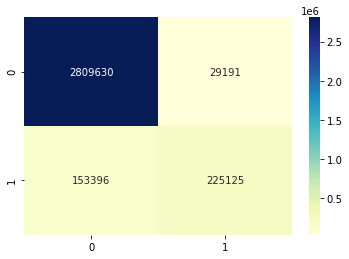

In [26]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt = 'd')


In [27]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9432491168175469
Precision: 0.885217603296686
Recall: 0.5947490363810727


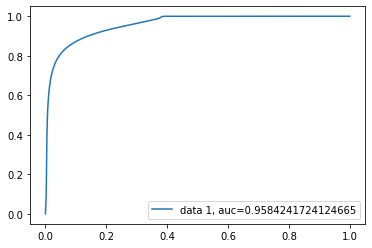

In [28]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label = "data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [35]:
#Training data set.
#Tweak stall_1 to be stall_2-3 for other scenario models.
X_train = df_read[feature_cols]
y_train = df_read.stall_2

In [36]:
#Testing data set.
X_test = df_read2[feature_cols]
y_test = df_read2.stall_2

In [37]:
logreg = LogisticRegression(max_iter=300)

In [38]:
logreg.fit(X_train, y_train)

C:\Users\JHeminger\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=300)

In [39]:
y_pred = logreg.predict(X_test)

In [40]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[2041615,  143798],
       [ 257488,  774441]], dtype=int64)

<AxesSubplot:>

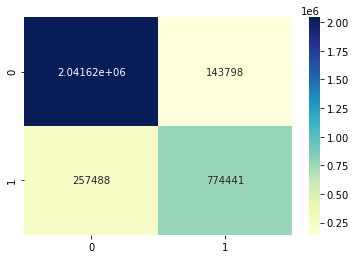

In [41]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt = 'g')


In [42]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8752740616322418
Precision: 0.8433980695657667
Recall: 0.7504789573701292


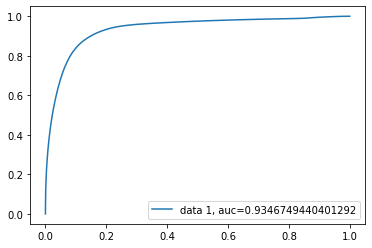

In [43]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label = "data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [44]:
#Training data set.
#Tweak stall_1 to be stall_2-3 for other scenario models.
X_train = df_read[feature_cols]
y_train = df_read.stall_3

In [45]:
#Testing data set.
X_test = df_read2[feature_cols]
y_test = df_read2.stall_3

In [46]:
logreg = LogisticRegression(max_iter=300)

In [47]:
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=300)

In [48]:
y_pred = logreg.predict(X_test)

In [49]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[2381373,   82053],
       [ 109481,  644435]], dtype=int64)

<AxesSubplot:>

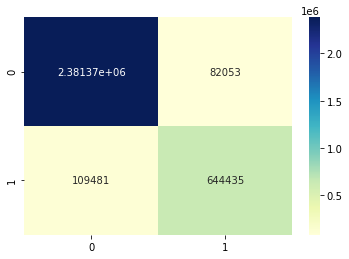

In [50]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt = 'g')


In [51]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9404682498783157
Precision: 0.8870552576229752
Recall: 0.85478355678882


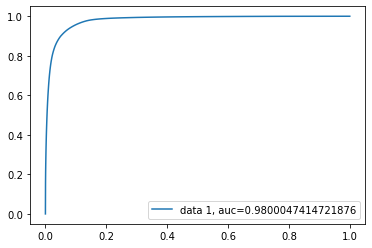

In [52]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label = "data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
#NOTE: THIS SECTION OF CODE IS FOR CROSS-VALIDATION.

In [3]:
# randomly set the inital parameters
import random
import math
import time
import pandas as pd
import numpy as np
#import pyarrow as pa
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

In [50]:
#Read file statement.  
#df_read = pd.read_csv('C:/Users/JHeminger/Desktop/DAEN 690/testingfile.csv')

In [51]:
#Read parquet file for training.  Set this to be the tenk_train_data
df_read = pq.read_table('C:/Users/JHeminger/Desktop/DAEN 690/tenk_train_data.pq').to_pandas()

In [52]:
#Create a "stall_1" to "stall_4" variable where all other scenarios are 0.
df_read['stall_1'] = df_read['stall'].replace({2: 0, 3: 0, 4: 0})

In [53]:
df_read['stall_2'] = df_read['stall'].replace({1: 0, 2: 1, 3: 0, 4: 0})

In [54]:
df_read['stall_3'] = df_read['stall'].replace({1: 0, 2: 0, 3: 1, 4: 0})

In [55]:
#set window for rolling stats
window = 10;

In [56]:
#rolling averages
df_read['roll_avg_pitch'] = df_read.groupby('name')['pitch'].transform(lambda x: x.rolling(window, 2).mean())
df_read['roll_avg_flight_path_angle'] = df_read.groupby('name')['flight_path_angle'].transform(lambda x: x.rolling(window, 2).mean())
df_read['roll_avg_airspeed'] = df_read.groupby('name')['airspeed'].transform(lambda x: x.rolling(window, 2).mean())
df_read['roll_avg_AOA'] = df_read.groupby('name')['AOA'].transform(lambda x: x.rolling(window, 2).mean())
df_read['roll_avg_roll'] = df_read.groupby('name')['roll'].transform(lambda x: x.rolling(window, 2).mean())
df_read['roll_avg_vertical_speed'] = df_read.groupby('name')['vertical_speed'].transform(lambda x: x.rolling(window, 2).mean())
df_read['roll_avg_altitude'] = df_read.groupby('name')['altitude'].transform(lambda x: x.rolling(window, 2).mean())

In [57]:
#rolling variance
df_read['roll_var_pitch'] = df_read.groupby('name')['pitch'].transform(lambda x: x.rolling(window, 2).var())
df_read['roll_var_flight_path_angle'] = df_read.groupby('name')['flight_path_angle'].transform(lambda x: x.rolling(window, 2).var())
df_read['roll_var_airspeed'] = df_read.groupby('name')['airspeed'].transform(lambda x: x.rolling(window, 2).var())
df_read['roll_var_AOA'] = df_read.groupby('name')['AOA'].transform(lambda x: x.rolling(window, 2).var())
df_read['roll_var_roll'] = df_read.groupby('name')['roll'].transform(lambda x: x.rolling(window, 2).var())
df_read['roll_var_vertical_speed'] = df_read.groupby('name')['vertical_speed'].transform(lambda x: x.rolling(window, 2).var())
df_read['roll_var_altitude'] = df_read.groupby('name')['altitude'].transform(lambda x: x.rolling(window, 2).var())

In [58]:
#Replaces all rolling statistic values equal to NaN, and sets them to 0.
df_read = df_read.fillna(0)

In [53]:
#Create a variable for feature columns, and for the target variable.
#Tweak stall_1 to be stall_2-4 for other scenario models.
X = df_read[feature_cols]
y = df_read.stall_1

In [60]:
#Cross validation

In [54]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [55]:
scores = cross_val_score(logreg, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [56]:
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.965 (0.019)


In [57]:
#Create a variable for feature columns, and for the target variable.
#Tweak stall_1 to be stall_2-4 for other scenario models.
X = df_read[feature_cols]
y = df_read.stall_2

In [58]:
#Cross validation

In [59]:
scores = cross_val_score(logreg, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [60]:
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.870 (0.006)


In [61]:
#Create a variable for feature columns, and for the target variable.
#Tweak stall_1 to be stall_2-4 for other scenario models.
X = df_read[feature_cols]
y = df_read.stall_3

In [62]:
#Cross validation

In [63]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [64]:
scores = cross_val_score(logreg, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [65]:
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.941 (0.002)


In [1]:
#NOTE: THIS SECTION OF CODE IS FOR FEEDING OF PREDICTIONS FORWARD INTO LATER MODELS.

In [2]:
# randomly set the inital parameters
import random
import math
import time
import pandas as pd
import numpy as np
#import pyarrow as pa
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

In [3]:
#pip install pyarrow

In [4]:
pd.set_option("display.max_columns", None)

In [5]:
pd.set_option("display.max_rows", None)

In [6]:
#NOTE: THIS SECTION OF CODE IS FOR MULTI-CLASSIFICATION.

In [7]:
#Read file statement.  
#df_read = pd.read_csv('C:/Users/JHeminger/Desktop/DAEN 690/testingfile.csv')

In [8]:
#Read file statement.  
#df_read2 = pd.read_csv('C:/Users/JHeminger/Desktop/DAEN 690/testingfile.csv')

In [9]:
#Read parquet file for training.  Set this to be the tenk_train_data
df_read = pq.read_table('C:/Users/JHeminger/Desktop/DAEN 690/tenk_train_data.pq').to_pandas()

In [10]:
#Read pqrquet file for testing.  Set this to be the tenk_test_data
df_read2 = pq.read_table('C:/Users/JHeminger/Desktop/DAEN 690/tenk_train_data.pq').to_pandas()

In [11]:
#set window for rolling stats
window = 20;

In [12]:
#rolling averages
df_read['roll_avg_pitch'] = df_read.groupby('name')['pitch'].transform(lambda x: x.rolling(window, 2).mean())
df_read['roll_avg_flight_path_angle'] = df_read.groupby('name')['flight_path_angle'].transform(lambda x: x.rolling(window, 2).mean())
df_read['roll_avg_airspeed'] = df_read.groupby('name')['airspeed'].transform(lambda x: x.rolling(window, 2).mean())
df_read['roll_avg_AOA'] = df_read.groupby('name')['AOA'].transform(lambda x: x.rolling(window, 2).mean())
df_read['roll_avg_roll'] = df_read.groupby('name')['roll'].transform(lambda x: x.rolling(window, 2).mean())
df_read['roll_avg_vertical_speed'] = df_read.groupby('name')['vertical_speed'].transform(lambda x: x.rolling(window, 2).mean())
df_read['roll_avg_altitude'] = df_read.groupby('name')['altitude'].transform(lambda x: x.rolling(window, 2).mean())

In [13]:
#rolling variance
df_read['roll_var_pitch'] = df_read.groupby('name')['pitch'].transform(lambda x: x.rolling(window, 2).var())
df_read['roll_var_flight_path_angle'] = df_read.groupby('name')['flight_path_angle'].transform(lambda x: x.rolling(window, 2).var())
df_read['roll_var_airspeed'] = df_read.groupby('name')['airspeed'].transform(lambda x: x.rolling(window, 2).var())
df_read['roll_var_AOA'] = df_read.groupby('name')['AOA'].transform(lambda x: x.rolling(window, 2).var())
df_read['roll_var_roll'] = df_read.groupby('name')['roll'].transform(lambda x: x.rolling(window, 2).var())
df_read['roll_var_vertical_speed'] = df_read.groupby('name')['vertical_speed'].transform(lambda x: x.rolling(window, 2).var())
df_read['roll_var_altitude'] = df_read.groupby('name')['altitude'].transform(lambda x: x.rolling(window, 2).var())

In [14]:
#Replaces all rolling statistic values equal to NaN, and sets them to 0.
df_read = df_read.fillna(0)

In [15]:
#set window for rolling stats
window = 20;

In [16]:
#rolling averages
df_read2['roll_avg_pitch'] = df_read2.groupby('name')['pitch'].transform(lambda x: x.rolling(window, 2).mean())
df_read2['roll_avg_flight_path_angle'] = df_read2.groupby('name')['flight_path_angle'].transform(lambda x: x.rolling(window, 2).mean())
df_read2['roll_avg_airspeed'] = df_read2.groupby('name')['airspeed'].transform(lambda x: x.rolling(window, 2).mean())
df_read2['roll_avg_AOA'] = df_read2.groupby('name')['AOA'].transform(lambda x: x.rolling(window, 2).mean())
df_read2['roll_avg_roll'] = df_read2.groupby('name')['roll'].transform(lambda x: x.rolling(window, 2).mean())
df_read2['roll_avg_vertical_speed'] = df_read2.groupby('name')['vertical_speed'].transform(lambda x: x.rolling(window, 2).mean())
df_read2['roll_avg_altitude'] = df_read2.groupby('name')['altitude'].transform(lambda x: x.rolling(window, 2).mean())

In [17]:
#rolling variance
df_read2['roll_var_pitch'] = df_read2.groupby('name')['pitch'].transform(lambda x: x.rolling(window, 2).var())
df_read2['roll_var_flight_path_angle'] = df_read2.groupby('name')['flight_path_angle'].transform(lambda x: x.rolling(window, 2).var())
df_read2['roll_var_airspeed'] = df_read2.groupby('name')['airspeed'].transform(lambda x: x.rolling(window, 2).var())
df_read2['roll_var_AOA'] = df_read2.groupby('name')['AOA'].transform(lambda x: x.rolling(window, 2).var())
df_read2['roll_var_roll'] = df_read2.groupby('name')['roll'].transform(lambda x: x.rolling(window, 2).var())
df_read2['roll_var_vertical_speed'] = df_read2.groupby('name')['vertical_speed'].transform(lambda x: x.rolling(window, 2).var())
df_read2['roll_var_altitude'] = df_read2.groupby('name')['altitude'].transform(lambda x: x.rolling(window, 2).var())

In [18]:
#Replaces all rolling statistic values equal to NaN, and sets them to 0.
df_read2 = df_read2.fillna(0)

In [19]:
#Rolling window and raw input variables combined.
feature_cols = [
    'altitude',
    'vertical_speed',
    'roll',
    'AOA',
    'airspeed',
    'flight_path_angle',
    'pitch',
    'roll_avg_pitch',
    'roll_avg_flight_path_angle',
    'roll_avg_airspeed',
    'roll_avg_AOA',
    'roll_avg_roll',
    'roll_avg_vertical_speed',
    'roll_avg_altitude',
    'roll_var_pitch',
    'roll_var_flight_path_angle',
    'roll_var_airspeed',
    'roll_var_AOA',
    'roll_var_roll',
    'roll_var_vertical_speed',
    'roll_var_altitude'
]

In [20]:
#Training data set.
#Tweak stall_1 to be stall_2-3 for other scenario models.
X_train = df_read[feature_cols]
y_train = df_read.stall

In [21]:
#Testing data set.
X_test = df_read2[feature_cols]
y_test = df_read2.stall

In [22]:
logreg = LogisticRegression(max_iter=300)

In [23]:
logreg.fit(X_train, y_train)

C:\Users\JHeminger\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=300)

In [24]:
y_pred = logreg.predict(X_test)

In [25]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1026212,   26760,       4,       0],
       [  94343,  270307,   10899,    2972],
       [  20344,   63079,  892842,   55664],
       [   2842,    3048,  128192,  619834]], dtype=int64)

<AxesSubplot:>

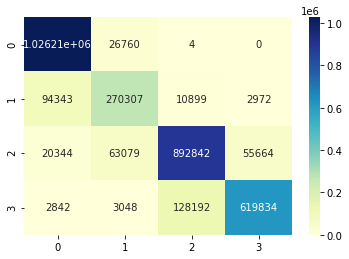

In [26]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt = 'g')


In [31]:
df_read_one = pq.read_table('C:/Users/JHeminger/Desktop/DAEN 690/single_sim_new.pq').to_pandas()

In [32]:
df_read_one.head()

,name,time_to_buffet,time_from_buffet_to_positive_angle_of_Attack,time_from_buffet_to_uncommanded_descent,time_from_buffet_to_uncommanded_roll,time_from_buffet_to_uncommanded_decent_high,rate_of_change_AOA,mag_of_uncommanded_descent,mag_of_uncommanded_descent_high,mag_of_uncommanded_roll,alt_avg_num_points,initial_altitude,time,altitude,vertical_speed,roll,AOA,airspeed,flight_path_angle,pitch,stall
0,ABX-SINGLE-SIM,52,58.8,62.9,65.9,67.9,0.03,4.266667,15.716667,17,20,14596,37.0,14595.98,-0.19,0.0,0.0,249.8,-0.04,-0.04,0
1,ABX-SINGLE-SIM,52,58.8,62.9,65.9,67.9,0.03,4.266667,15.716667,17,20,14596,37.1,14596.04,0.56,0.0,0.0,249.8,0.13,0.13,0
2,ABX-SINGLE-SIM,52,58.8,62.9,65.9,67.9,0.03,4.266667,15.716667,17,20,14596,37.2,14596.31,2.77,0.0,0.0,249.8,0.63,0.63,0
3,ABX-SINGLE-SIM,52,58.8,62.9,65.9,67.9,0.03,4.266667,15.716667,17,20,14596,37.3,14596.55,2.35,0.0,0.0,249.8,0.54,0.54,0
4,ABX-SINGLE-SIM,52,58.8,62.9,65.9,67.9,0.03,4.266667,15.716667,17,20,14596,37.4,14596.04,-5.08,0.0,0.0,249.8,-1.17,-1.17,0


In [33]:
#set window for rolling stats
window = 20;

In [34]:
#rolling averages
df_read_one['roll_avg_pitch'] = df_read_one.groupby('name')['pitch'].transform(lambda x: x.rolling(window, 2).mean())
df_read_one['roll_avg_flight_path_angle'] = df_read_one.groupby('name')['flight_path_angle'].transform(lambda x: x.rolling(window, 2).mean())
df_read_one['roll_avg_airspeed'] = df_read_one.groupby('name')['airspeed'].transform(lambda x: x.rolling(window, 2).mean())
df_read_one['roll_avg_AOA'] = df_read_one.groupby('name')['AOA'].transform(lambda x: x.rolling(window, 2).mean())
df_read_one['roll_avg_roll'] = df_read_one.groupby('name')['roll'].transform(lambda x: x.rolling(window, 2).mean())
df_read_one['roll_avg_vertical_speed'] = df_read_one.groupby('name')['vertical_speed'].transform(lambda x: x.rolling(window, 2).mean())
df_read_one['roll_avg_altitude'] = df_read_one.groupby('name')['altitude'].transform(lambda x: x.rolling(window, 2).mean())

In [35]:
#rolling variance
df_read_one['roll_var_pitch'] = df_read_one.groupby('name')['pitch'].transform(lambda x: x.rolling(window, 2).var())
df_read_one['roll_var_flight_path_angle'] = df_read_one.groupby('name')['flight_path_angle'].transform(lambda x: x.rolling(window, 2).var())
df_read_one['roll_var_airspeed'] = df_read_one.groupby('name')['airspeed'].transform(lambda x: x.rolling(window, 2).var())
df_read_one['roll_var_AOA'] = df_read_one.groupby('name')['AOA'].transform(lambda x: x.rolling(window, 2).var())
df_read_one['roll_var_roll'] = df_read_one.groupby('name')['roll'].transform(lambda x: x.rolling(window, 2).var())
df_read_one['roll_var_vertical_speed'] = df_read_one.groupby('name')['vertical_speed'].transform(lambda x: x.rolling(window, 2).var())
df_read_one['roll_var_altitude'] = df_read_one.groupby('name')['altitude'].transform(lambda x: x.rolling(window, 2).var())

In [39]:
df_read_one = df_read_one.fillna(0)

In [40]:
X_onesim = df_read_one[feature_cols]
y_onesim = df_read_one.stall

In [41]:
pstall = logreg.predict(X_onesim)

In [49]:
df_read_one['stallp'] = pstall

In [46]:
df_read_one.head(5000)

,name,time_to_buffet,time_from_buffet_to_positive_angle_of_Attack,time_from_buffet_to_uncommanded_descent,time_from_buffet_to_uncommanded_roll,time_from_buffet_to_uncommanded_decent_high,rate_of_change_AOA,mag_of_uncommanded_descent,mag_of_uncommanded_descent_high,mag_of_uncommanded_roll,alt_avg_num_points,initial_altitude,time,altitude,vertical_speed,roll,AOA,airspeed,flight_path_angle,pitch,stall,roll_avg_pitch,roll_avg_flight_path_angle,roll_avg_airspeed,roll_avg_AOA,roll_avg_roll,roll_avg_vertical_speed,roll_avg_altitude,roll_var_pitch,roll_var_flight_path_angle,roll_var_airspeed,roll_var_AOA,roll_var_roll,roll_var_vertical_speed,roll_var_altitude,pstall
0,ABX-SINGLE-SIM,52,58.8,62.9,65.9,67.9,0.03,4.266667,15.716667,17,20,14596,37.0,14595.98,-0.19,0.00,0.00,249.80,-0.04,-0.04,0,0.000000,0.000000,0.0000,0.0000,0.0000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,ABX-SINGLE-SIM,52,58.8,62.9,65.9,67.9,0.03,4.266667,15.716667,17,20,14596,37.1,14596.04,0.56,0.00,0.00,249.80,0.13,0.13,0,0.045000,0.045000,249.8000,0.0000,0.0000,1.850000e-01,14596.010000,0.014450,0.014450,0.000000,0.000000,0.000000,0.281250,0.001800,0
2,ABX-SINGLE-SIM,52,58.8,62.9,65.9,67.9,0.03,4.266667,15.716667,17,20,14596,37.2,14596.31,2.77,0.00,0.00,249.80,0.63,0.63,0,0.240000,0.240000,249.8000,0.0000,0.0000,1.046667e+00,14596.110000,0.121300,0.121300,0.000000,0.000000,0.000000,2.368033,0.030900,0
3,ABX-SINGLE-SIM,52,58.8,62.9,65.9,67.9,0.03,4.266667,15.716667,17,20,14596,37.3,14596.55,2.35,0.00,0.00,249.80,0.54,0.54,0,0.315000,0.315000,249.8000,0.0000,0.0000,1.372500e+00,14596.220000,0.103367,0.103367,0.000000,0.000000,0.000000,2.003358,0.069000,0
4,ABX-SINGLE-SIM,52,58.8,62.9,65.9,67.9,0.03,4.266667,15.716667,17,20,14596,37.4,14596.04,-5.08,0.00,0.00,249.80,-1.17,-1.17,0,0.018000,0.018000,249.8000,0.0000,0.0000,8.200000e-02,14596.184000,0.518570,0.518570,0.000000,0.000000,0.000000,9.829470,0.058230,0
5,ABX-SINGLE-SIM,52,58.8,62.9,65.9,67.9,0.03,4.266667,15.716667,17,20,14596,37.5,14596.02,-0.17,0.00,0.00,249.80,-0.04,-0.04,0,0.008333,0.008333,249.8000,0.0000,0.0000,4.000000e-02,14596.156667,0.415417,0.415417,0.000000,0.000000,0.000000,7.874160,0.051067,0
6,ABX-SINGLE-SIM,52,58.8,62.9,65.9,67.9,0.03,4.266667,15.716667,17,20,14596,37.6,14596.01,-0.13,0.00,0.00,249.80,-0.03,-0.03,0,0.002857,0.002857,249.8000,0.0000,0.0000,1.571429e-02,14596.135714,0.346390,0.346390,0.000000,0.000000,0.000000,6.565929,0.045629,0
7,ABX-SINGLE-SIM,52,58.8,62.9,65.9,67.9,0.03,4.266667,15.716667,17,20,14596,37.7,14595.92,-0.95,0.00,0.00,249.80,-0.22,-0.22,0,-0.025000,-0.025000,249.8000,0.0000,0.0000,-1.050000e-01,14596.108750,0.303114,0.303114,0.000000,0.000000,0.000000,5.744514,0.044927,0
8,ABX-SINGLE-SIM,52,58.8,62.9,65.9,67.9,0.03,4.266667,15.716667,17,20,14596,37.8,14595.77,-1.51,0.00,0.00,249.80,-0.35,-0.35,0,-0.061111,-0.061111,249.8000,0.0000,0.0000,-2.611111e-01,14596.071111,0.276961,0.276961,0.000000,0.000000,0.000000,5.245786,0.052061,0
9,ABX-SINGLE-SIM,52,58.8,62.9,65.9,67.9,0.03,4.266667,15.716667,17,20,14596,37.9,14596.15,3.79,0.00,0.00,249.80,0.87,0.87,0,0.032000,0.032000,249.8000,0.0000,0.0000,1.440000e-01,14596.079000,0.332884,0.332884,0.000000,0.000000,0.000000,6.304071,0.046899,0


In [50]:
stall_time = df_read_one.loc[df_read_one['stall'] == 1, ['time']].min().values[0]
stall_time_2 = df_read_one.loc[df_read_one['stall'] == 2, ['time']].min().values[0]
stall_time_3 = df_read_one.loc[df_read_one['stall'] == 3, ['time']].min().values[0]
stall_time_4 = df_read_one.loc[df_read_one['stallp'] == 1, ['time']].min().values[0]
stall_time_5 = df_read_one.loc[df_read_one['stallp'] == 2, ['time']].min().values[0]
stall_time_6 = df_read_one.loc[df_read_one['stallp'] == 3, ['time']].min().values[0]

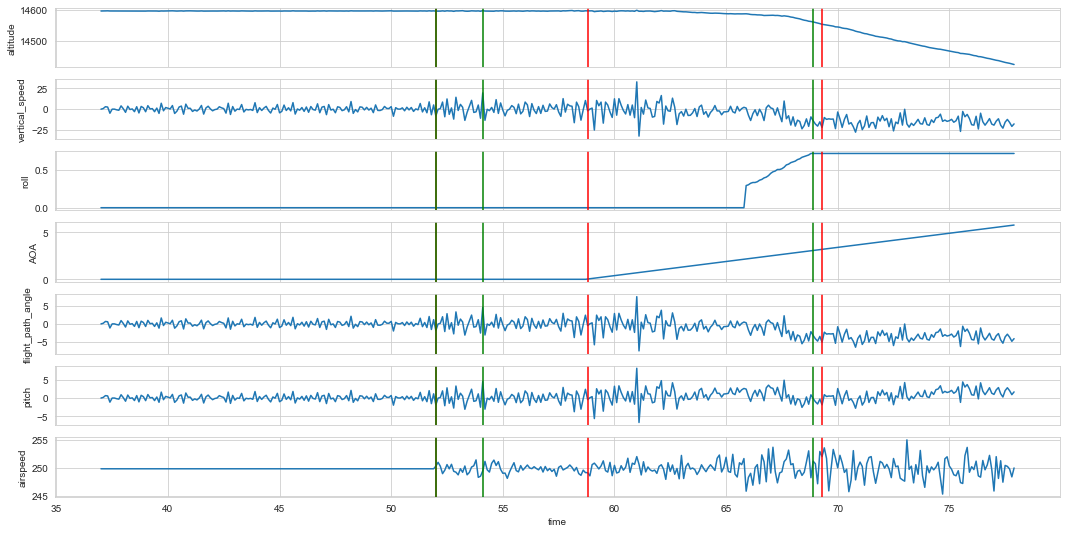

In [54]:
## Make plots 
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
fig, axs = plt.subplots(ncols=1, nrows=7, figsize=(18,9), sharex=True)
plt = sns.lineplot(x='time', y='altitude', data=df_read_one, ax=axs[0])
plt.axvline(stall_time, color='red')
plt.axvline(stall_time_2, color='red')
plt.axvline(stall_time_3, color='red')
plt.axvline(stall_time_4, color='green')
plt.axvline(stall_time_5, color='green')
plt.axvline(stall_time_6, color='green')

plt = sns.lineplot(x='time', y='vertical_speed', data=df_read_one, ax=axs[1])
plt.axvline(stall_time, color='red')
plt.axvline(stall_time_2, color='red')
plt.axvline(stall_time_3, color='red')
plt.axvline(stall_time_4, color='green')
plt.axvline(stall_time_5, color='green')
plt.axvline(stall_time_6, color='green')

plt = sns.lineplot(x='time', y='roll', data=df_read_one, ax=axs[2])
plt.axvline(stall_time, color='red')
plt.axvline(stall_time_2, color='red')
plt.axvline(stall_time_3, color='red')
plt.axvline(stall_time_4, color='green')
plt.axvline(stall_time_5, color='green')
plt.axvline(stall_time_6, color='green')

plt = sns.lineplot(x='time', y='AOA', data=df_read_one, ax=axs[3])
plt.axvline(stall_time, color='red')
plt.axvline(stall_time_2, color='red')
plt.axvline(stall_time_3, color='red')
plt.axvline(stall_time_4, color='green')
plt.axvline(stall_time_5, color='green')
plt.axvline(stall_time_6, color='green')

plt = sns.lineplot(x='time', y='flight_path_angle', data=df_read_one, ax=axs[4])
plt.axvline(stall_time, color='red')
plt.axvline(stall_time_2, color='red')
plt.axvline(stall_time_3, color='red')
plt.axvline(stall_time_4, color='green')
plt.axvline(stall_time_5, color='green')
plt.axvline(stall_time_6, color='green')

plt = sns.lineplot(x='time', y='pitch', data=df_read_one, ax=axs[5])
plt.axvline(stall_time, color='red')
plt.axvline(stall_time_2, color='red')
plt.axvline(stall_time_3, color='red')
plt.axvline(stall_time_4, color='green')
plt.axvline(stall_time_5, color='green')
plt.axvline(stall_time_6, color='green')

plt = sns.lineplot(x='time', y='airspeed', data=df_read_one, ax=axs[6])
plt.axvline(stall_time, color='red')
plt.axvline(stall_time_2, color='red')
plt.axvline(stall_time_3, color='red')
plt.axvline(stall_time_4, color='green')
plt.axvline(stall_time_5, color='green')
plt.axvline(stall_time_6, color='green')

left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 10   # the bottom of the subplots of the figure
top = 11      # the top of the subplots of the figure
wspace = 0.2   # the amount of width reserved for blank space between subplots
hspace = 0.2   # the amount of height reserved for white space between subplots
hspace = 0.2   # the amount of height reserved for white space between subplots

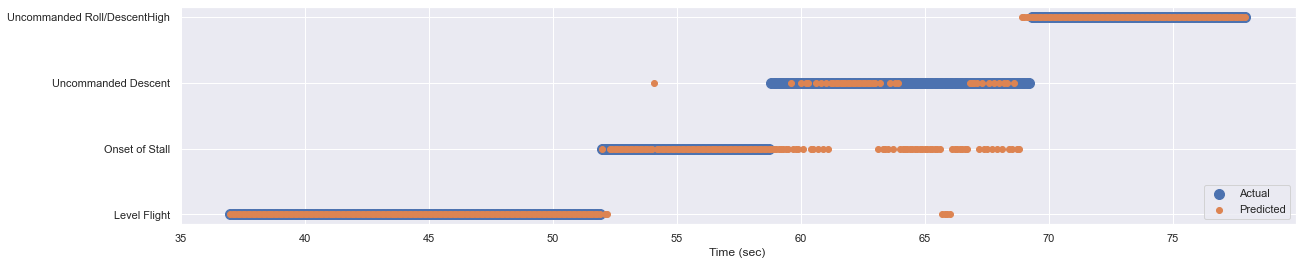

In [59]:
# To visualize actual vs predicted

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

labels_dict = {0: "Level Flight", 1: "Onset of Stall", 
                   2: "Uncommanded Descent", 3: "Uncommanded Roll/DescentHigh"}

flight_data = df_read_one

x = flight_data['time']
y = flight_data['stall'].replace(labels_dict)
y1 = flight_data['stallp'] # Assign output from the classifier for this particular flight

sns.set(style="darkgrid")
plt.figure(figsize=(20,4))
plt.scatter(x, y, label = "Actual", s=100)
plt.scatter(x, y1, label = "Predicted")
plt.xlabel('Time (sec)')
plt.legend(loc="lower right")
fig = plt.gcf()
plt.show()

In [61]:
stall_time

52.00000000000021

In [62]:
stall_time_2

58.80000000000031

In [63]:
stall_time_3

69.30000000000047

In [64]:
stall_time_4

52.00000000000021

In [65]:
stall_time_5

54.10000000000024

In [66]:
stall_time_6

68.90000000000046